# Ejercicio:

Fragoso Alvarado Daniel | 316049054

Priemro vamos a establecer las clases que vimos en clase y que son base para las modificacions que vamos a realizar

In [1]:
from abc import ABC, abstractmethod 
from math import floor, sqrt, exp

import random

import numpy as np
import matplotlib.pyplot as plt

# Para reproducibilidad
semilla = 123
random.seed(semilla)
np.random.seed(semilla)

## Creando tablas _hash_ en Python
Definimos una clase abstracta para nuestra estructura de datos, especificando sus métodos principales.

In [2]:
class TablaHash(ABC):
  def __init__(self, n_cubetas):
    self.n_cubetas = n_cubetas
    self.tabla = [[] for i in range(n_cubetas)]

  def __getitem__(self, x):
    return self.tabla[self.h(x)]

  def __repr__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas)]
    return "<TablaHash :%s >" % ('\n'.join(contenido))

  def __str__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas) if self.tabla[i]]
    return '\n'.join(contenido)

  @abstractmethod
  def h(self, x):
    pass

  @abstractmethod
  def insertar(self, x):
    pass

  @abstractmethod
  def buscar(self, x):
    pass
    
  @abstractmethod
  def eliminar(self, x):
    pass

In [3]:
class THOA(TablaHash):
  def __init__(self, n_cubetas):
    super().__init__(n_cubetas)
    self.colisiones = np.zeros(n_cubetas)

  def sl(self, cubeta, i):
    return (cubeta + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    cubeta = self.h(x)  
    self.colisiones[cubeta] += 1
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if not self.tabla[ind]:
        self.tabla[ind].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == x:
        return ind

    return -1

  def eliminar(self, x):
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == x:
        self.tabla[ind].remove(x)
        return ind
        
    return -1

class THModOA(THOA):
  def h(self, x):
    return x % self.n_cubetas 

In [4]:
class THUnivOA(THOA):
  def __init__(self, n_cubetas, a, b, primo):
    super().__init__(n_cubetas)
    self.a = a
    self.b = b
    self.primo = primo
  
  def h(self, x):
    return ((self.a * x + self.b) % self.primo) % self.n_cubetas

## Familia $\mathcal{H}$ por método de división
Comúnmente se busca diseñar funciones _hash_ $h$ que sean independientes de los objetos a almacenar. Un método general para crear funciones _hash_ se conoce como el _método de división_ y consiste en usar el residuo de la división del objeto y el tamaño de la tabla $m$, esto es,

\begin{equation}
    h(x) = x \mod{m}
\end{equation}

Es conveniente usar un número primo para $m$.

Definimos una clase hija de `TablaHash` que implemente la función anterior. Para resolver colisiones usamos encadenamiento, esto es, cada cubeta o registro de la tabla es una lista que contiene todos los objetos que son mapeados al índice correspondiente.

In [5]:
class THMod(TablaHash):
  def h(self, x):
    return x % self.n_cubetas

  def insertar(self, x):
    self.tabla[self.h(x)].append(x)
  
  def buscar(self, x):
    return x in self.tabla[self.h(x)]
      
  def eliminar(self, x):
    self.tabla[self.h(x)].remove(x)

# Ejercicio

Fragoso Alvrado Daniel | 316049054


Realiza lo siguiente:
1. Implementa una tabla que realice sondeo cuadrático. Elige un número primo grande para $m$ y $c_1 = c_2 = 1$ y prueba la tabla con el conjunto de 200 números. 

$$
h(x, i) = (h'(x) + c_1 \cdot i + c_2 \cdot i^2)\mod{m}
$$



In [6]:
class Hash_Cuadratica(TablaHash):
  # Definimos los nuevos parámetros
  def __init__(self, n_cubetas, c1, c2):
    super().__init__(n_cubetas)
    self.c1 = c1
    self.c2 = c2
    self.n_cubetas = n_cubetas
    self.colisiones = np.zeros(n_cubetas)

  
# Actualicemos la función Hash con lo dado por ejl ejercicio

  def sl(self, cubeta, i):
    return ((cubeta+ self.c1*i + self.c2*i**2)%self.n_cubetas)

  def insertar(self, x):
    llena = True
    cubeta = self.h(x)  
    self.colisiones[cubeta] += 1
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if not self.tabla[ind]:
        self.tabla[ind].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == x:
        return ind

    return -1

  def eliminar(self, x):
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == x:
        self.tabla[ind].remove(x)
        return ind
        
    return -1

class HCuad_Mod(Hash_Cuadratica):
  def h(self, x):
    return x % self.n_cubetas

In [7]:
# Probemos con el ejemplo dado
n_objetos = 200
conj = np.random.randint(1000, high=5890123, size=n_objetos)

cuad = HCuad_Mod(281, 1, 1)
for i, e in enumerate(conj):
  cuad.insertar(e)
print(cuad)

0::[4513402]
1::[143843]
2::[189396]
5::[5330155]
6::[555543]
8::[821652]
11::[4968934]
14::[1956898]
17::[5309512]
19::[822787]
20::[812863]
21::[4090819]
22::[5231680]
23::[1574185]
24::[5193657]
25::[3710068]
27::[48078]
28::[4617139]
29::[3439750]
30::[41337]
31::[1720313]
32::[1242052]
33::[2978633]
34::[2292430]
35::[5600644]
36::[4024793]
37::[628628]
38::[4327719]
40::[2289897]
41::[2166551]
42::[1324114]
43::[337803]
44::[211637]
45::[347060]
46::[3454379]
47::[1650360]
48::[4154065]
49::[220632]
50::[2821569]
51::[621904]
52::[5387103]
55::[755102]
56::[1749269]
57::[1963123]
60::[4242879]
61::[57385]
63::[1917045]
64::[3817407]
65::[3839087]
66::[5603206]
67::[1779359]
68::[3777270]
69::[2742067]
70::[5643674]
71::[1435419]
72::[970365]
73::[892780]
74::[2344174]
76::[5130574]
79::[2707203]
80::[1885584]
82::[276586]
83::[1563848]
85::[2670428]
87::[4657381]
89::[2411350]
91::[153798]
94::[971230]
96::[310882]
99::[3021130]
100::[3287238]
101::[1952206]
102::[1271627]
104::[

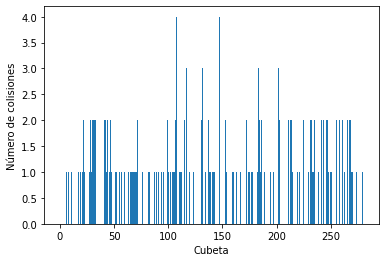

In [8]:
plt.bar(np.arange(cuad.colisiones.size), cuad.colisiones)
plt.xlabel('Cubeta')
plt.ylabel(u'Número de colisiones')
plt.show()

2. Desarrolla un programa que cuente el número de ocurrencias de todas las subcadenas de longitud entre 5 a 10 (sin considerar espacios en blanco ni signos de admiración/interrogación ni caracteres especiales) usando funciones y tablas _hash_. Prueba este programa en la base de datos de _20 newsgroups_.

In [9]:
# primero vamos a descargar los datos.

from sklearn.datasets import fetch_20newsgroups
newsg = fetch_20newsgroups()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [10]:
# Vamos a juntar los registros
texto = ' '.join(newsg.data)

# Ahora vamos a sepatrarlos de forma que sea palabra por palabra
palabras = texto.split()

In [11]:
# Vamos a eliminar primero las mayusculas por medio de lower(), pero solo 
# a aquellas palabras que sean lafanumericas, pues deseamos descartar 
# plabras con caracteres especiales

palabras = [d.lower() for d in palabras if d.isalnum()]

# Ahora filtremos las palabras mayor a 5 y menor a 10

palabras = [p for p in palabras if len(p) >= 5 and len(p) <= 10]

In [12]:
palabras

['university',
 'college',
 'wondering',
 'anyone',
 'there',
 'could',
 'enlighten',
 'other',
 'sports',
 'looked',
 'early',
 'called',
 'doors',
 'really',
 'front',
 'bumper',
 'separate',
 'anyone',
 'tellme',
 'model',
 'engine',
 'years',
 'where',
 'whatever',
 'funky',
 'looking',
 'please',
 'brought',
 'lerxst',
 'clock',
 'final',
 'final',
 'clock',
 'reports',
 'university',
 'washington',
 'number',
 'brave',
 'souls',
 'upgraded',
 'their',
 'clock',
 'oscillator',
 'shared',
 'their',
 'please',
 'brief',
 'message',
 'detailing',
 'speed',
 'rated',
 'cards',
 'usage',
 'floppy',
 'floppies',
 'especially',
 'please',
 'network',
 'knowledge',
 'clock',
 'upgrade',
 'answered',
 'purdue',
 'university',
 'computer',
 'network',
 'finally',
 'ghost',
 'weekend',
 'after',
 'starting',
 'market',
 'machine',
 'sooner',
 'intended',
 'looking',
 'picking',
 'powerbook',
 'maybe',
 'bunch',
 'questions',
 'somebody',
 'anybody',
 'round',
 'powerbook',
 'heard',
 'suppos

Para generar el conteo vamos a tomar como referencia la función vista en clase:

In [13]:
class THUnivCad(THUnivOA):
  def __init__(self, n_cubetas, a, b, primo, g):
    super().__init__(n_cubetas, a, b, primo)
    self.g = g
  
  def s2i(self, s):
    return sum([ord(c) * self.g**i for i, c in enumerate(s)])

  
  # Vamos a Modificar la función Insertar

  def insertar(self, s):
    x = int(self.s2i(s))
    cubeta = self.h(x)
    self.colisiones[cubeta] += 1
    
    llena = True
    # Creamos un contador
    cnt = 1
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if not self.tabla[ind]:
        # Por cada inserción en la tabla se agregará una tupla, con el contador.
        self.tabla[ind].append((s, cnt))
        llena = False
        break
      # Vamos a agregar la condición por si se repite
      # En caso de que haya una colisión
      if self.tabla[ind]:
        # Entonces vamos a verificar si de verdad se trata de la misma cadena
        if s == self.tabla[ind][0][0]:
          # De ser así tomamos la cadena, y aumentamos el valor del contador
          self.tabla[ind][0] = (self.tabla[ind][0][0], self.tabla[ind][0][1] + 1)
          llena = False
          break


    if llena:
      print('Tabla llena')


  def buscar(self, s):
    x = self.s2i(s)
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == s:
        return ind

    return -1

  def eliminar(self, s):
    x = self.s2i(s)
    cubeta = self.h(x)
    for i in range(self.n_cubetas):
      ind = self.sl(cubeta, i)
      if self.tabla[ind][0] == s:
        self.tabla[ind].remove(s)
        return ind

    return -1

In [14]:
# Vamos a genrar el conteo

a = random.randint(1, 104729 - 1)
b = random.randint(0, 104729 - 1)

thucad = THUnivCad(1000003, a, b, 104729, 1.1)
for e in palabras:
  thucad.insertar(e)
print(thucad)

62::[('homicide', 58)]
63::[('attacked', 79)]
64::[('breathed', 2)]
65::[('landgraf', 1)]
66::[('enriched', 6)]
67::[('bacteria', 26)]
68::[('detained', 3)]
69::[('delegate', 1)]
70::[('fastback', 5)]
71::[('basename', 3)]
72::[('hedgehog', 3)]
73::[('anglican', 4)]
74::[('mordecai', 3)]
75::[('traffice', 1)]
76::[('metcalfe', 4)]
77::[('kelbajar', 15)]
78::[('delicate', 7)]
79::[('catolica', 1)]
80::[('accreted', 1)]
81::[('darkened', 5)]
82::[('falkland', 10)]
83::[('indebted', 2)]
84::[('scancode', 1)]
85::[('checkman', 1)]
86::[('carthage', 2)]
87::[('carraige', 1)]
88::[('realible', 2)]
89::[('calamine', 1)]
90::[('caufield', 1)]
91::[('ellerbee', 2)]
135::[('accidental', 32)]
136::[('forseeable', 4)]
137::[('kapeldreef', 1)]
138::[('interlaced', 9)]
139::[('accelerate', 24)]
140::[('xloadimage', 12)]
141::[('undeclared', 6)]
142::[('technicial', 1)]
143::[('attendance', 25)]
144::[('xcleararea', 3)]
145::[('beautified', 2)]
146::[('magellenic', 1)]
147::[('elucidated', 1)]
148::[